In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
from sympy import solve, symbols
%matplotlib inline

# Pandas Basics

## Data Frame

In [ ]:
# DataFrame Construction
# pd.DataFrame(data=array, index=list, columns=list)
list_=[1,2,3]
array=np.array(list_)
Series=pd.Series(list_)
pd_DataFrame=pd.DataFrame(list_,['x1','x2','x3'],columns=['num']) # (list_value,list_index)
pd_DataFrame2=pd.DataFrame(array,index=['x1','x2','x3'],columns=['num']) # (array_value,list_index) <=> pd_DataFrame1
pd_DataFrame3=pd.DataFrame(array,np.array(['x1','x2','x3']),columns=['num'])# (array_value,array_index) <=> pd_DataFrame1
pd_DataFrame4=pd.DataFrame({"num":Series}) # (dict)
pd_DataFrame5=pd.DataFrame(Series,columns=['num']) # (series) NO INDEX! <=> pd_DataFrame4
print pd_DataFrame
print pd_DataFrame4

### Stock Data 

In [2]:
import pandas.io.data as web
import datetime
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 27)
yf = web.DataReader("MSFT", 'yahoo', start, end) 

D:\Users\Gerald W. LIU\Anaconda2\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [ ]:
print type(yf)
print yf.shape # (num of rows, num of columns), tuple
print yf.head() # first five rows, DataFrame
print yf.tail() # last five rows, DataFrame

print yf.index[-1] #title of the last index
print yf.columns[0] #title of the first column

# Indexing
print yf.ix[0] #first ROW, all columns <=> yf.iloc[0,:]
# <=> yf.ix["2010-01-04"]  #row with index "2010-01-04"
print yf.iloc[:,0] #all rows, first COLUMN
# <=> yf["Open"] <=> yf.Open #column with title "Open"
print yf.iloc[1:2,:2] # 2nd to 3rd row, 1st to 3rd columns ==> (2,3) shaped DataFrame

# DataFrame.iloc[m,:] = Row m
# DataFrame.iloc[:,p] = Column p
# DataFrame.iloc[m:n, p:q] = Row m to Row n, Row p to Row q ==> (n-m+1, q-p+1) DataFrame
# m or n, p or q left out <=> 0     m and n, p and q left out (i.e. : ) <=> all rows/columns

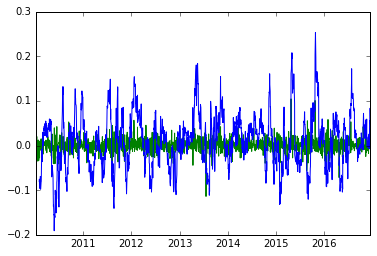

In [3]:
price=yf['Close']
price_change_1=price.pct_change()# = (price-price.shift(1))/price.shift(1)    Series.shift(n) <=> shift n row upwards (or -n row downwards, if n is negative)
price_change_20=price.pct_change(periods=20) # = (price-price.shift(1))/price.shift(1)
plt.plot(price_change_1,color='g')
plt.plot(price_change_20,color='b')

D:\Users\Gerald W. LIU\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  if __name__ == '__main__':
D:\Users\Gerald W. LIU\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).mean()
  from ipykernel import kernelapp as app
D:\Users\Gerald W. LIU\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=90,center=False).mean()
  app.launch_new_instance()
D:\Users\Gerald W. LIU\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rollin

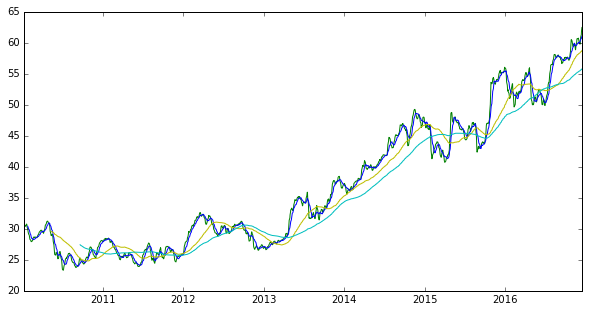

In [4]:
fast_signal1=pd.rolling_mean(price,5) # pd.rolling_mean(Series or DataFrame, n)    a_i=avg(price[i], price[i- (n-1)])
fast_signal2=pd.rolling_mean(price,15)
slow_signal1=pd.rolling_mean(price,90)
slow_signal2=pd.rolling_mean(price,180)
plt.figure(figsize=(10,5))
plt.plot(fast_signal1,color='g')
plt.plot(fast_signal2,color='b')
plt.plot(slow_signal1,color='y')
plt.plot(slow_signal2,color='c')

## Series

In [ ]:
Series1=yf['Open'] 
print type(Series1)
print Series1['2010-01-04'] # item with index '2010-01-04'
print Series1[0] # first item in the series
print Series1.index[0] # index of the first item
print Series1[Series1.index[0]] # item with the index of the first item, which is the first item

# Numpy Basics

## Array Construction

In [ ]:
# repeat array
array=np.array([1,2,3])
array_doubled=np.repeat(array,2) # np.repeat(array,times)
print array_doubled
print np.repeat(np.array([1.0]),10) # produce an array of same numbers
print np.ones(10)
print np.zeros(10)

# take out elements
array=np.array([1,2,3])
indices=[1,2]
new_values=[4]
print np.take(array, indices) # take out elements with the given indices
print array[array>1]
print np.extract(array>1, array)# take out elements according to values

In [ ]:
# replace elements
np.put(array, indices, new_values) # replace elements with the given indices with given values
print array

array2=np.array([[1,2,3],[4,5,6],[7,8,9]])
print array2.item(3) # turn the array into arr[1,2,3,...,9] and get arr[3]
print array2.item((1,0)) # get (array2[1])[0]
array2.itemset(0,2) # turn the array into arr[1,2,3,...,9] and change arr[0] into 2
print array2

# array.fill(value)
array=np.array([1,2,3])
array.fill(9)
print array

#sorting
array3=np.array([2,1,3])
print np.sort(array)  # return array sorted in ascending order
print np.argsort(array) # return indices of the sorted array, in the order of the old array
# 1 is smallest, in sorted is [0], and 2 is [1], 3 is [2]. Look back at [2,1,3], now it should be [1,0,2]

# Data Types

## List

In [ ]:
# Methods:
List.append(x) # Add an item to the end of the List; equivalent to a[len(a):] = [x].
List.extend(L) # append all items in L to List; equivalent to a[len(a):] = L.
List.insert(i, x) # Insert x BEFORE the item indexed i
List.remove(x) # Remove the FIRST item valued x
List.pop(i) # Remove the item indexed i, and RETURN it
List.index(x) # Return the index of the FIRST item valued x
List.count(x) # Count x in List
List.sort(reverse=False) # Ascending; Descending if reverse=True
List.reverse() # Reverse the list, from the last to the first (not sorting!)

In [ ]:
list_1=[1,2,3]

list_3=list_1+[4]
print list_3

list_2=[4+i for i in list_1] # list2 = [f(x) for x in list1]
print list_2

list_4=range(20)
print list_4[3]
print list_4[-1] # the last item       list[-n] <=> the nth item counted from the last one
print list_4[:3] # list[:n] <=> all items before list[n] <=> first n items
print list_4[3:] # list[n:] <=> all items starting from list[n]

In [ ]:
# filter(function, list) returns a list of the items for which function(item) is true.
print 'Even numbers in [2,5] are',filter(lambda x: x%2==0, range(2,6))
# filter(function, list) is equivalent to [item for item in list if function(item)]

In [ ]:
#list subtraction
print 'Odd numbers are',list(set(range(2,6))-set(filter(lambda x: x%2==0, range(2,6)))) # convert list to set first, then convert it back
print 'Odd numbers are',[i for i in range(2,6) if i not in filter(lambda x: x%2==0, range(2,6))]

## Integer, Float, Long, String

In [ ]:
integer_=1
float_=1.0
print 1/3 # int/int=int(floored quotient)
print 1.0/3 # float*int or int*float or float/int or int/float
print 1.0//3 # floored quotient

In [ ]:
long_=1L
print type(long_)
Series=pd.Series([1,2,3])
print type(Series.sum())

In [ ]:
A=1
B='A'
C=str(A)+B
print str.lower(B)
print str.upper(str.lower(B))
print str.replace('ABCD', 'BCD', 'A') # str.replace(entire string, old string, new string)

### Basic Arithmetic 

## Numpy Array

In [ ]:
array=np.array([1,2,3])
array2=np.array([[1,2,3],[4,5,6],[7,8,9]])
print array[0], array2[0]
print 'length:',len(array),len(array2)

In [ ]:
array3=array*2
print array3
array4=array**2
print array4

## Tuple

In [ ]:
tuple_a=(2,3,4)
tuple_b=(i+4 for i in tuple_a)
print type(tuple_a)
print tuple_b
print type(tuple_b)

## Dictionary

In [ ]:
dic1={"Gender":"male","Height":180,"Weight":75,"GPA":4.15}
print dic1
print dic1["Gender"]
print dic1["Height"]
dic2={"Gender":["male",'female'],"Height":[180,172],"Weight":[75,50],"GPA":[4.15,3.92]}
print dic2
print dic2["Gender"]
print dic2["Height"]

# Looping Techniques

In [ ]:
# loop over two or more sequences at the same time
questions = ['name', 'quest', 'favorite color']
answers = ['lancelot', 'the holy grail', 'blue']
for q, a in zip(questions, answers):
    print 'What is your {0}?  It is {1}.'.format(q, a)

In [ ]:
# get index and value at the same time
for i, v in enumerate(['tic', 'tac', 'toe']):
    print i, v

In [ ]:
# loop over a sequence in reverse
for i in reversed(range(1,10,2)):
    print i

In [ ]:
# loop over a sequence in sorted order
basket = ['apple', 'orange', 'apple', 'pear', 'orange', 'banana']
for f in sorted(set(basket)): # set(basket) remove identical items
    print f

In [ ]:
# looping through dictionaries, get key and value at the same time
knights = {'gallahad': 'the pure', 'robin': 'the brave'}
for k, v in knights.iteritems():
    print k, v

In [ ]:
# break
for n in range(2, 6):
    for x in range(2, n):
        if n % x == 0:
            print '{} is a composite number equal to {} * {}'.format(n,x,n/x)
            break # to terminate the loop, here means going to the next number (because one factor has been found, which is enough to determine it's a composite number)
    else:
        print n, 'is a prime number'

In [ ]:
# continue
for num in range(2, 6):
    if num % 2 == 0:
        print "Found an even number", num
        continue #to terminate this iteration and go to the next
    print "Found an odd number", num

In [ ]:
# equivalent to the above cell
for num in range(2, 6):
    if num % 2 == 0:
        print "Found an even number", num
    else:
        print "Found an odd number", num

# Functions

In [ ]:
def plus10(x):
    return x+10

def printplus10(x):
    print x+10

lplus10=lambda x: x+10

print plus10(1)
printplus10(1)
print lplus10(1)

In [ ]:
# def function with parameter
def plusnum(n):
    return lambda x: x+n
print plusnum(10)(1)

f=plusnum(10)
print f(1)

def plus(n,x):
    return n+x
print plus(10,1)

In [ ]:
# map(function, iterable):  Apply function to every item of iterable and return a list of the results
print map(lambda x: x*2+1, range(5)) # print y=2x+1 (x=0,1,2,3,4)
print map(lambda x: x+10, range(5))
print map(plus10, range(5))

In [ ]:
#reduce(function, iterable): Apply function of two arguments cumulatively to the items of iterable from left to right
print reduce(lambda x,y: x+y, range(5)) # (((0+1)+2)+3)+4